# Vectorstores and Embeddings

Recall the overall workflow for retrieval augmented generation (RAG):

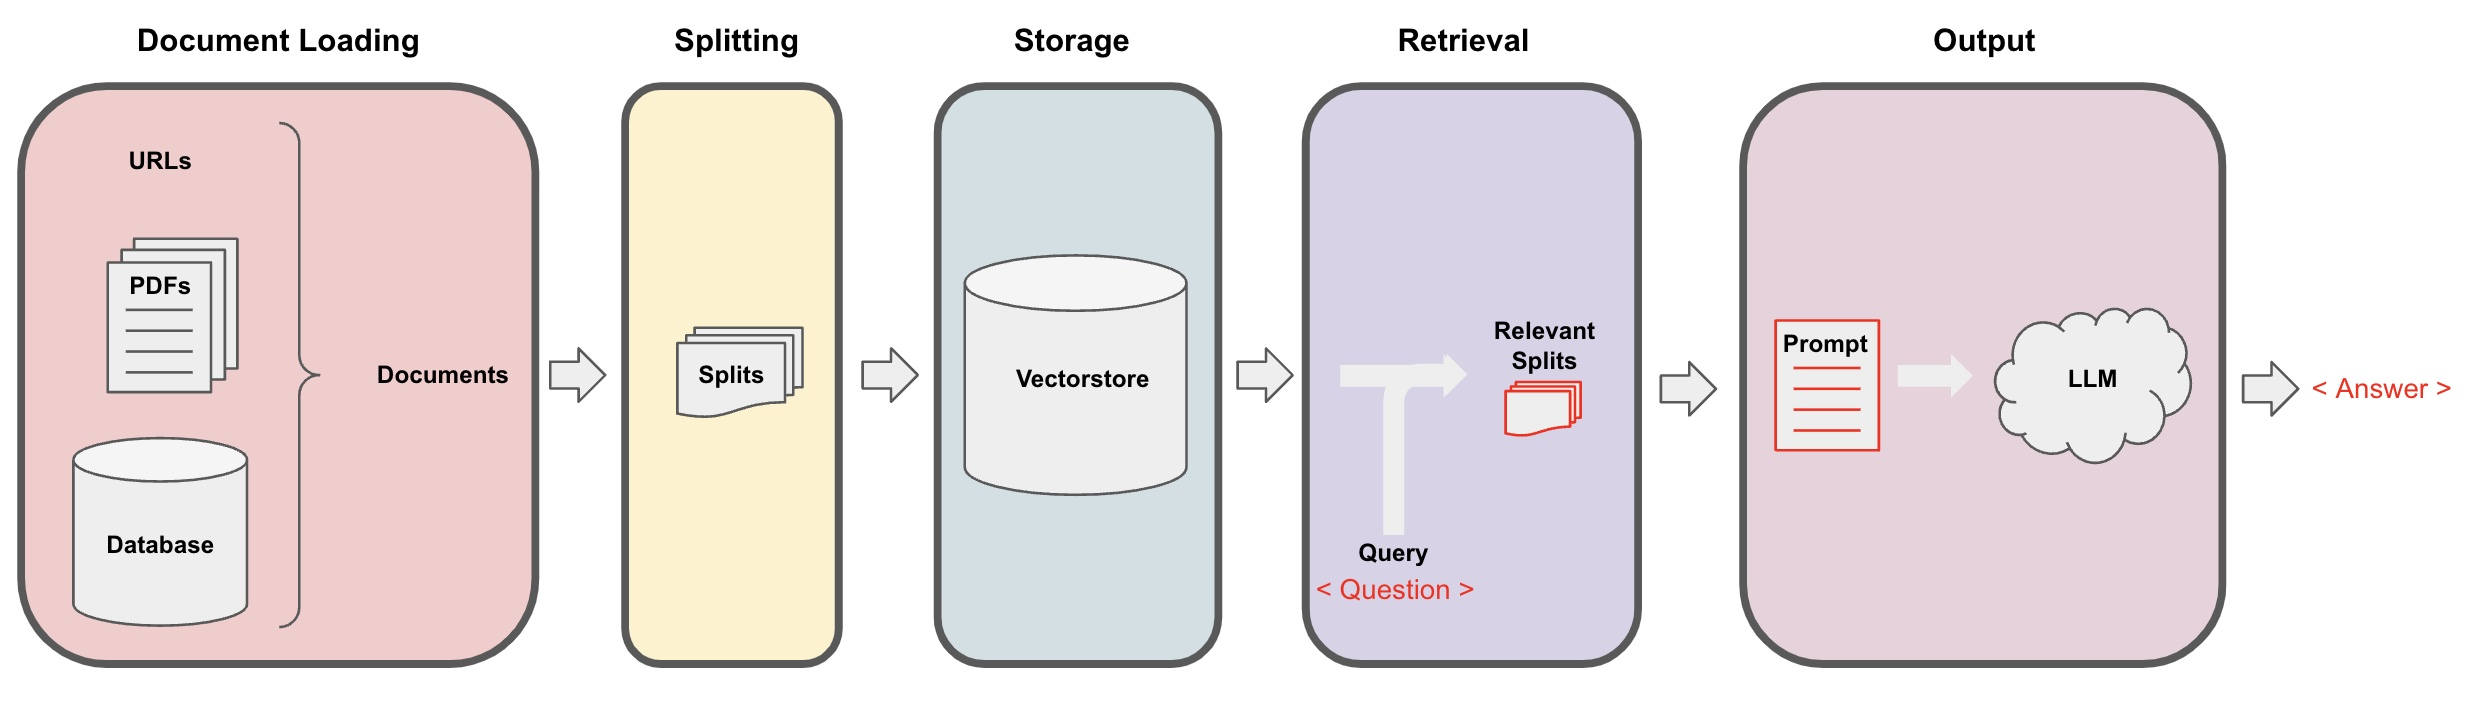

We just discussed `Document Loading` and `Splitting`.

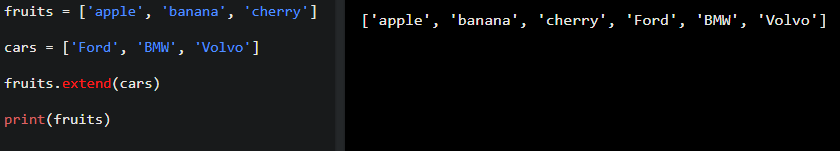

In [1]:
from langchain_community.document_loaders import PyPDFLoader

# Load PDF
loaders = [
    # Duplicate documents on purpose - messy data
    PyPDFLoader("data/docs/cs229_lectures/MachineLearning-Lecture01.pdf"),
    # duplicate the first document for purpose of simulating some dirty data
    PyPDFLoader("data/docs/cs229_lectures/MachineLearning-Lecture01.pdf"), 
    PyPDFLoader("data/docs/cs229_lectures/MachineLearning-Lecture02.pdf"),
    PyPDFLoader("data/docs/cs229_lectures/MachineLearning-Lecture03.pdf")
]
docs = []
for loader in loaders:
    docs.extend(loader.load())

In [2]:
# Split
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150
)

In [3]:
splits = text_splitter.split_documents(docs)

In [4]:
len(splits)

209

## Embeddings

Let's take our splits and embed them.

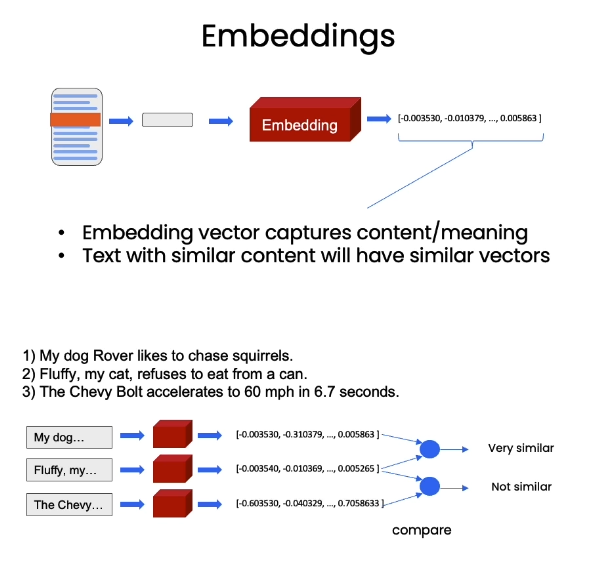

In [5]:
from langchain_openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings()

In [6]:
sentence1 = "i like dogs"
sentence2 = "i like canines"
sentence3 = "the weather is ugly outside"

In [7]:
embedding1 = embedding.embed_query(sentence1)
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

In [8]:
import numpy as np

In [9]:
np.dot(embedding1, embedding2)

0.9630351468341319

In [10]:
np.dot(embedding1, embedding3)

0.7701147942700531

In [11]:
np.dot(embedding2, embedding3)

0.7591130371091993

## Vectorstores

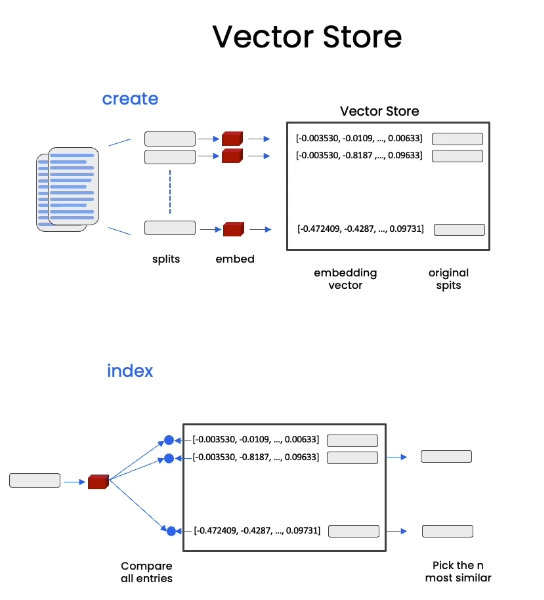

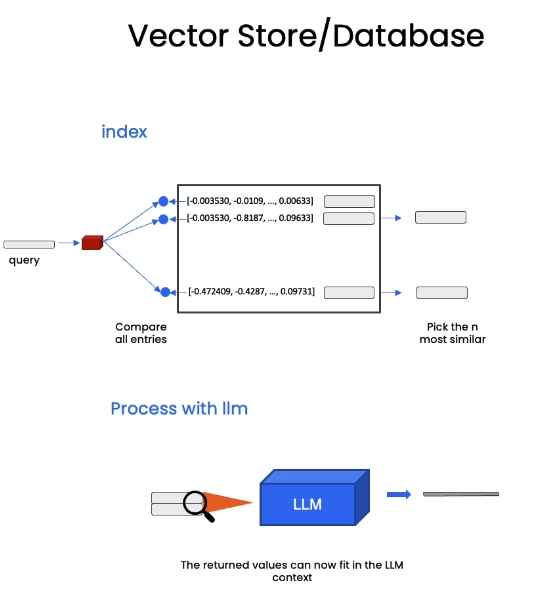

In [12]:
# ! pip install chromadb

In [13]:
from langchain_chroma import Chroma

In [14]:
persist_directory = 'data/docs/chroma/'

In [15]:
!rm -rf ./data/docs/chroma  # remove old database files if any

In [16]:
vectordb = Chroma.from_documents(
    documents=splits,
    embedding=embedding,
    persist_directory=persist_directory
)

In [17]:
print(vectordb._collection.count())

209


### Similarity Search

In [18]:
question = "is there an email i can ask for help"

In [19]:
docs = vectordb.similarity_search(question,k=3)

In [20]:
len(docs)

3

In [21]:
docs[0].page_content

"cs229-qa@cs.stanford.edu. This goes to an acc ount that's read by all the TAs and me. So \nrather than sending us email individually, if you send email to this account, it will \nactually let us get back to you maximally quickly with answers to your questions.  \nIf you're asking questions about homework probl ems, please say in the subject line which \nassignment and which question the email refers to, since that will also help us to route \nyour question to the appropriate TA or to me  appropriately and get the response back to \nyou quickly.  \nLet's see. Skipping ahead — let's see — for homework, one midterm, one open and term \nproject. Notice on the honor code. So one thi ng that I think will help you to succeed and \ndo well in this class and even help you to enjoy this cla ss more is if you form a study \ngroup.  \nSo start looking around where you' re sitting now or at the end of class today, mingle a \nlittle bit and get to know your classmates. I strongly encourage you to f

In [22]:
docs[1].page_content

"cs229-qa@cs.stanford.edu. This goes to an acc ount that's read by all the TAs and me. So \nrather than sending us email individually, if you send email to this account, it will \nactually let us get back to you maximally quickly with answers to your questions.  \nIf you're asking questions about homework probl ems, please say in the subject line which \nassignment and which question the email refers to, since that will also help us to route \nyour question to the appropriate TA or to me  appropriately and get the response back to \nyou quickly.  \nLet's see. Skipping ahead — let's see — for homework, one midterm, one open and term \nproject. Notice on the honor code. So one thi ng that I think will help you to succeed and \ndo well in this class and even help you to enjoy this cla ss more is if you form a study \ngroup.  \nSo start looking around where you' re sitting now or at the end of class today, mingle a \nlittle bit and get to know your classmates. I strongly encourage you to f

In [23]:
docs[2].page_content

"So all right, online resources. The class has a home page, so it's in on the handouts. I \nwon't write on the chalkboard — http:// cs229.stanford.edu. And so when there are \nhomework assignments or things like that, we  usually won't sort of — in the mission of \nsaving trees, we will usually not give out many handouts in class. So homework \nassignments, homework solutions will be posted online at the course home page.  \nAs far as this class, I've also written, a nd I guess I've also revised every year a set of \nfairly detailed lecture notes that cover the te chnical content of this  class. And so if you \nvisit the course homepage, you'll also find the detailed lecture notes that go over in detail \nall the math and equations and so on  that I'll be doing in class.  \nThere's also a newsgroup, su.class.cs229, also written on the handout. This is a \nnewsgroup that's sort of a forum for people in  the class to get to  know each other and \nhave whatever discussions you want to ha 

## Failure modes

This seems great, and basic similarity search will get you 80% of the way there very easily. 

But there are some failure modes that can creep up. 

Here are some edge cases that can arise - we'll fix them in the next class.

In [24]:
question = "what did they say about matlab?"

In [25]:
docs = vectordb.similarity_search(question,k=5)

Notice that we're getting duplicate chunks (because of the duplicate `MachineLearning-Lecture01.pdf` in the index).

Semantic search fetches all similar documents, but does not enforce diversity.

`docs[0]` and `docs[1]` are indentical.

In [26]:
docs[0]

Document(metadata={'page': 8, 'source': 'data/docs/cs229_lectures/MachineLearning-Lecture01.pdf'}, page_content='those homeworks will be done in either MATLA B or in Octave, which is sort of — I \nknow some people call it a free ve rsion of MATLAB, which it sort  of is, sort of isn\'t.  \nSo I guess for those of you that haven\'t s een MATLAB before, and I know most of you \nhave, MATLAB is I guess part of the programming language that makes it very easy to write codes using matrices, to write code for numerical routines, to move data around, to \nplot data. And it\'s sort of an extremely easy to  learn tool to use for implementing a lot of \nlearning algorithms.  \nAnd in case some of you want to work on your  own home computer or something if you \ndon\'t have a MATLAB license, for the purposes of  this class, there\'s also — [inaudible] \nwrite that down [inaudible] MATLAB — there\' s also a software package called Octave \nthat you can download for free off the Internet. And it has

In [27]:
docs[1]

Document(metadata={'page': 8, 'source': 'data/docs/cs229_lectures/MachineLearning-Lecture01.pdf'}, page_content='those homeworks will be done in either MATLA B or in Octave, which is sort of — I \nknow some people call it a free ve rsion of MATLAB, which it sort  of is, sort of isn\'t.  \nSo I guess for those of you that haven\'t s een MATLAB before, and I know most of you \nhave, MATLAB is I guess part of the programming language that makes it very easy to write codes using matrices, to write code for numerical routines, to move data around, to \nplot data. And it\'s sort of an extremely easy to  learn tool to use for implementing a lot of \nlearning algorithms.  \nAnd in case some of you want to work on your  own home computer or something if you \ndon\'t have a MATLAB license, for the purposes of  this class, there\'s also — [inaudible] \nwrite that down [inaudible] MATLAB — there\' s also a software package called Octave \nthat you can download for free off the Internet. And it has

We can see a new failure mode.

The question below asks a question about the third lecture, but includes results from other lectures as well.

In [28]:
question = "what did they say about regression in the third lecture?"

In [29]:
docs = vectordb.similarity_search(question,k=5)

In [30]:
for doc in docs:
    print(doc.metadata)

{'page': 0, 'source': 'data/docs/cs229_lectures/MachineLearning-Lecture03.pdf'}
{'page': 2, 'source': 'data/docs/cs229_lectures/MachineLearning-Lecture02.pdf'}
{'page': 14, 'source': 'data/docs/cs229_lectures/MachineLearning-Lecture03.pdf'}
{'page': 4, 'source': 'data/docs/cs229_lectures/MachineLearning-Lecture03.pdf'}
{'page': 0, 'source': 'data/docs/cs229_lectures/MachineLearning-Lecture02.pdf'}


In [31]:
print(docs[4].page_content)

really makes a difference between a good so lution and amazing solution. And to give 
everyone to just how we do points assignments, or what is it that causes a solution to get 
full marks, or just how to write amazing so lutions. Becoming a grad er is usually a good 
way to do that.  
Graders are paid positions and you also get free  food, and it's usually fun for us to sort of 
hang out for an evening and grade all the a ssignments. Okay, so I will send email. So 
don't email me yet if you want to be a grader. I'll send email to the entire class later with 
the administrative details and to solicit app lications. So you can email us back then, to 
apply, if you'd be interested in being a grader.  
Okay, any questions about that? All right, okay, so let's get started with today's material. 
So welcome back to the second lecture. What  I want to do today is talk about linear 
regression, gradient descent, and the norma l equations. And I should also say, lecture 
notes have been posted